# EDA Part 2:
We now explore the dataset by:


*   Visualizing the correlation matrix to identify highly correlated features.
*   Plotting the previously determined highly correlated features to visualize correlation patterns on scatter plots.
*   Visualizing data distributions by state as well as mean values of features using bar charts.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Used for running on Google Colab - remove when running elsewhere
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Used when running on Google Colab - remove when running elsewhere
from pathlib import Path

# Load dataset - used when running on Google Colab - remove when running elsewhere
path_to_assignment_dir = Path("/content/drive/MyDrive/STAT 4243GU - Applied Data Science")
df = pd.read_csv(path_to_assignment_dir / "cleaned_selected_features.csv")

# Load dataset - used when running outside of Google Colab
# df = pd.read_csv("cleaned_selected_features.csv")

# Convert 'state' to categorical
df['state'] = df['state'].astype(str)

# Set Seaborn style
sns.set(style="whitegrid")

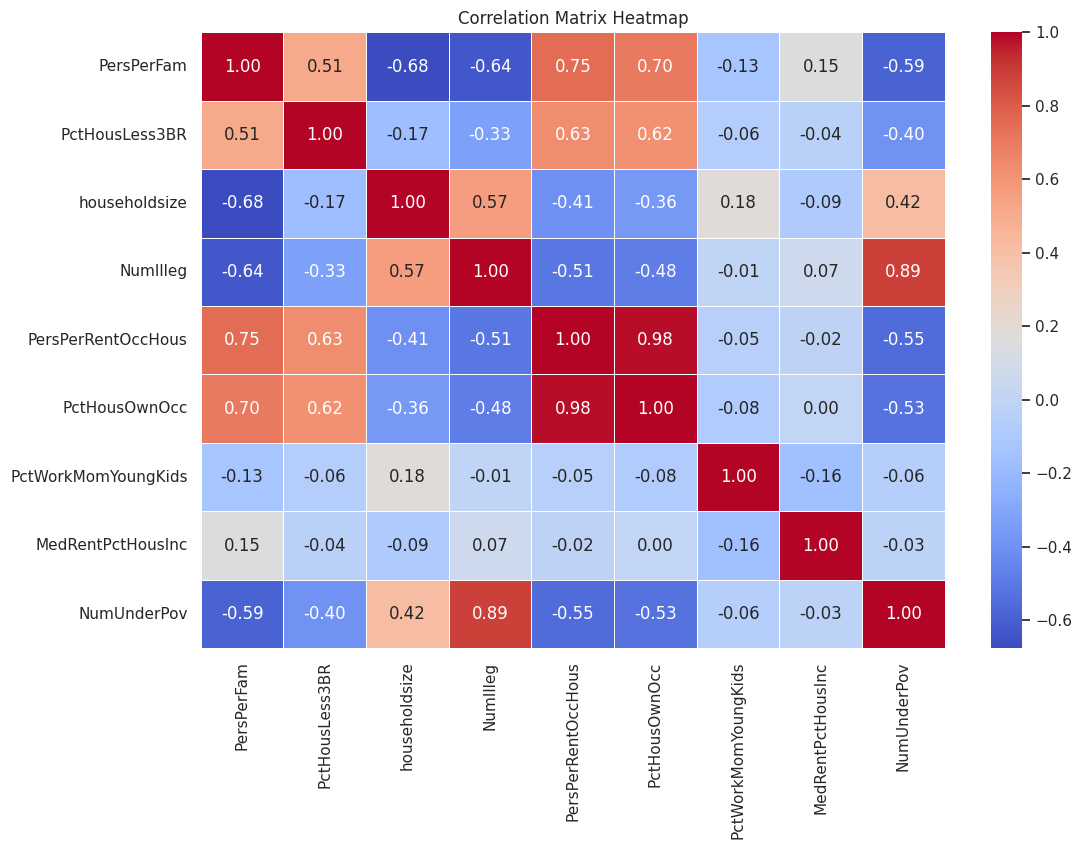

In [4]:
# Correlation Matrix & Heatmap
plt.figure(figsize=(12, 8))
corr = df.drop(columns=['state']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

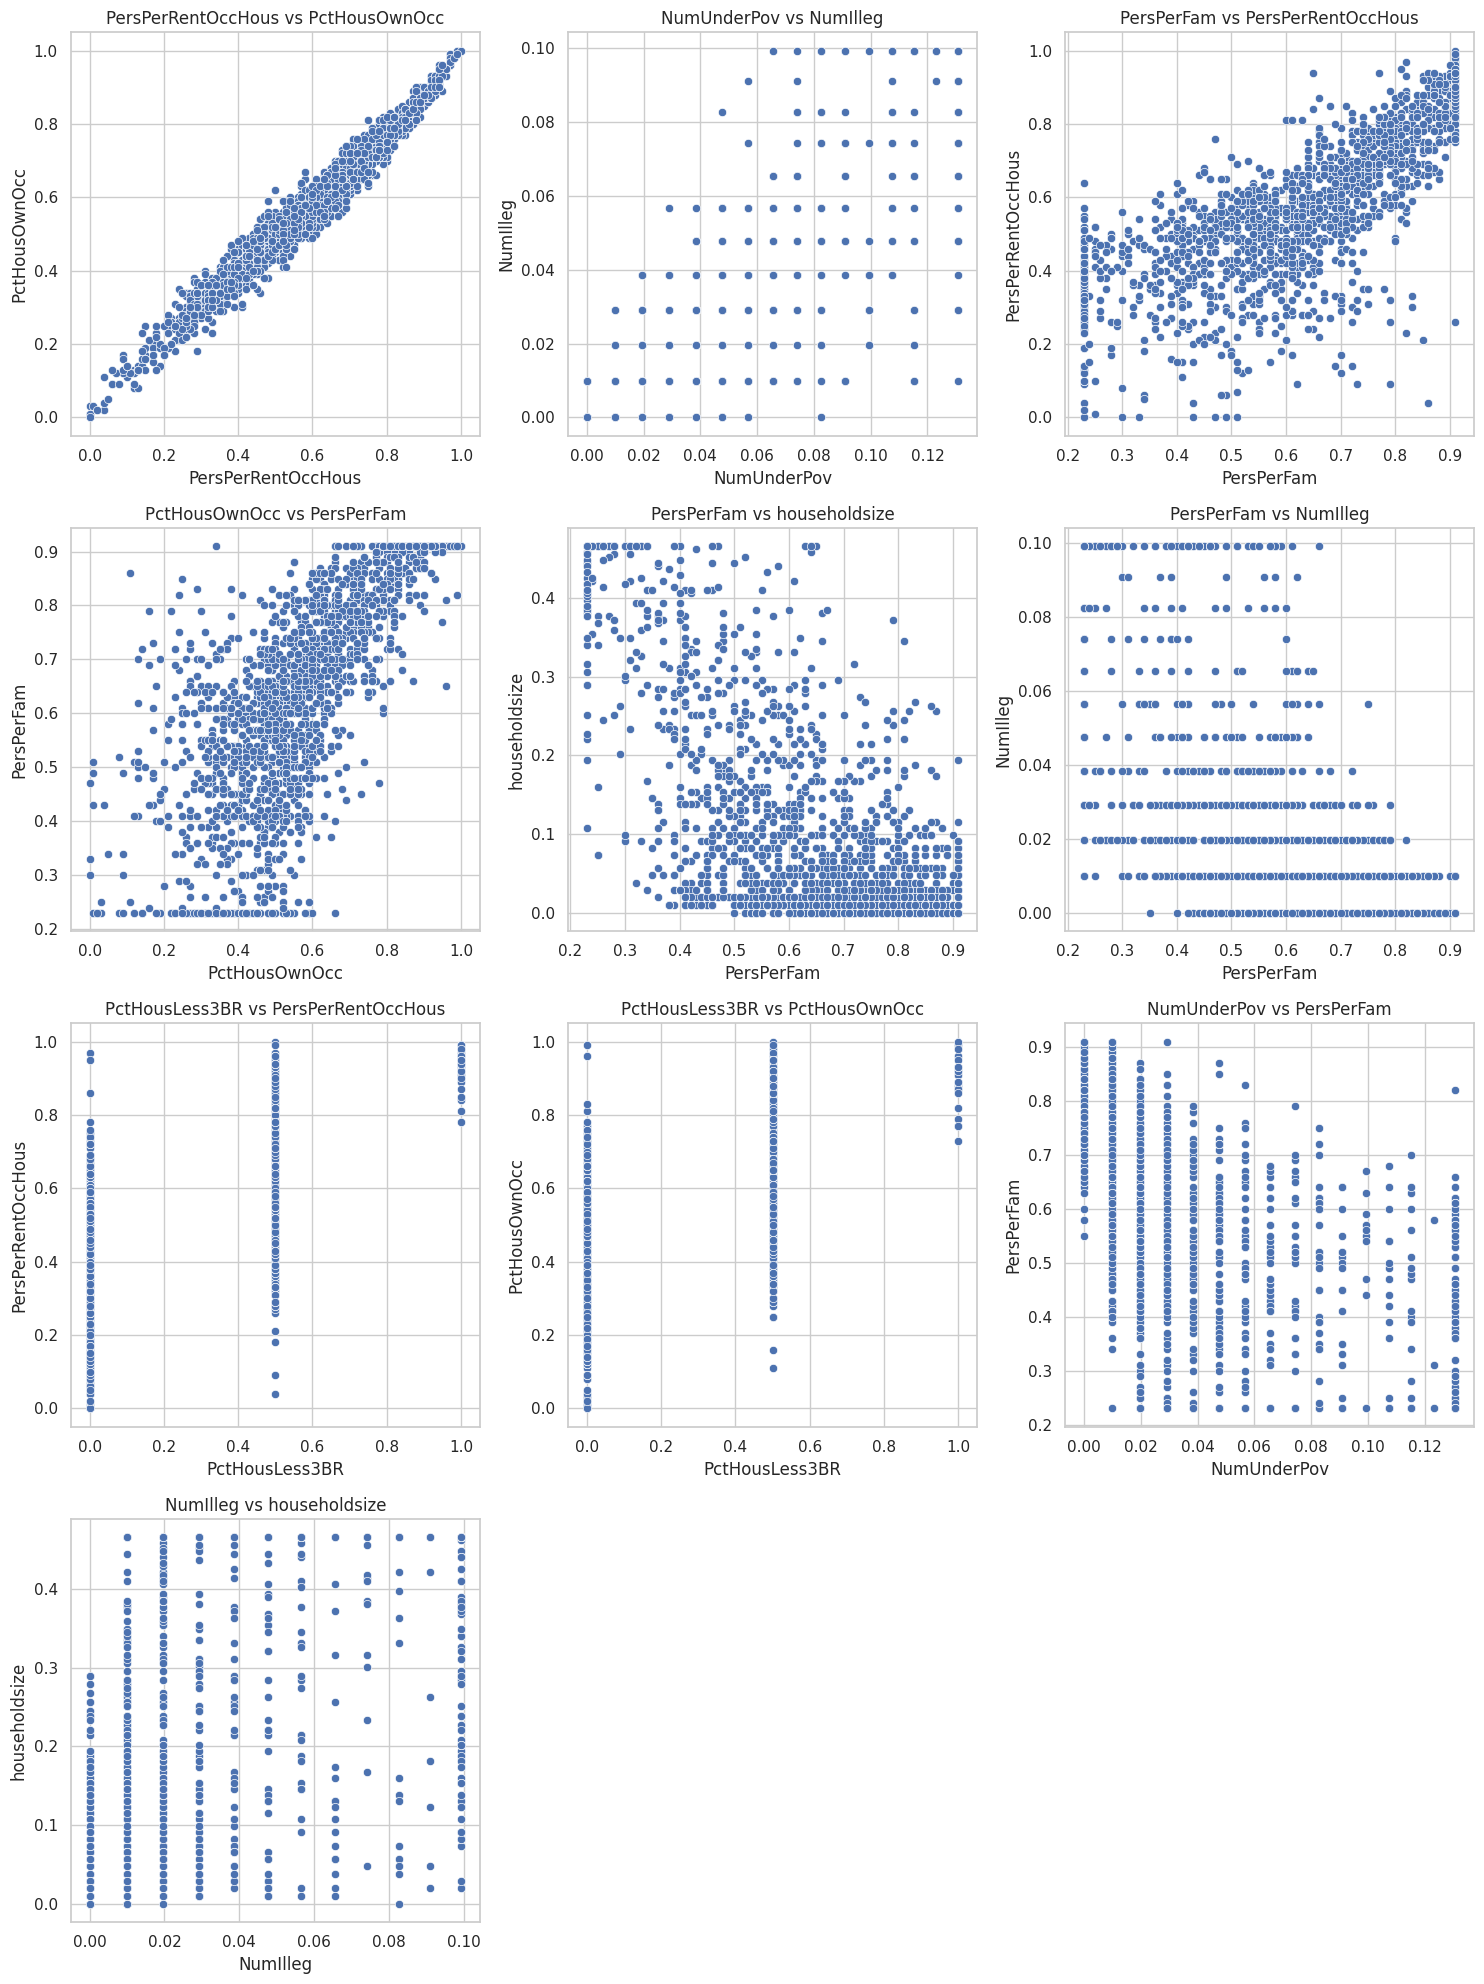

In [5]:
# Identify 10 most highly correlated feature pairs (absolute correlation > 0.5)
correlated_pairs = corr.abs().unstack().sort_values(ascending=False)
correlated_pairs = correlated_pairs[correlated_pairs < 1].drop_duplicates()
top_pairs = correlated_pairs[correlated_pairs > 0.5].index.tolist()[:10]

# Scatter Plots of 10 most highly correlated feature pairs
n_pairs = len(top_pairs)
plt.figure(figsize=(15, 5 * (n_pairs // 3 + 1)))  # Adjust figure size dynamically
for i, (x_feature, y_feature) in enumerate(top_pairs):
    plt.subplot((n_pairs // 3) + 1, 3, i+1)
    sns.scatterplot(x=df[x_feature], y=df[y_feature])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature}")
plt.tight_layout()
plt.show()

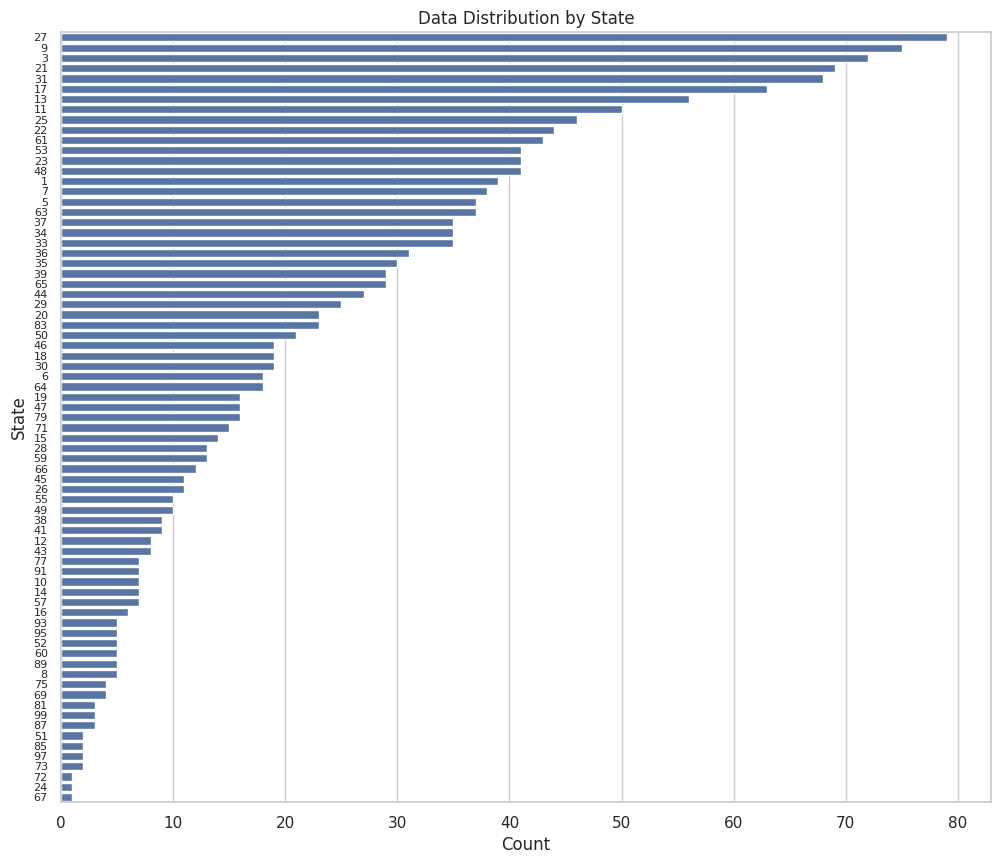

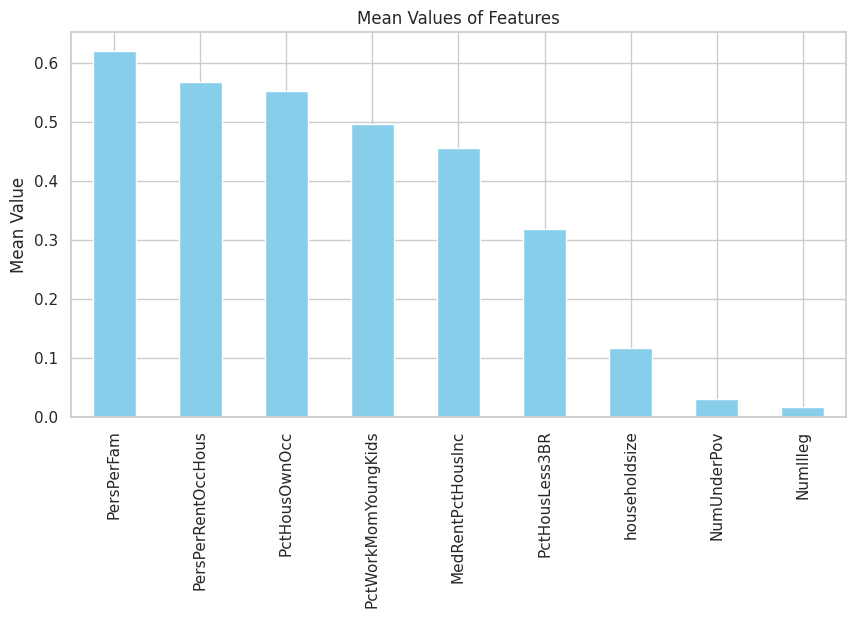

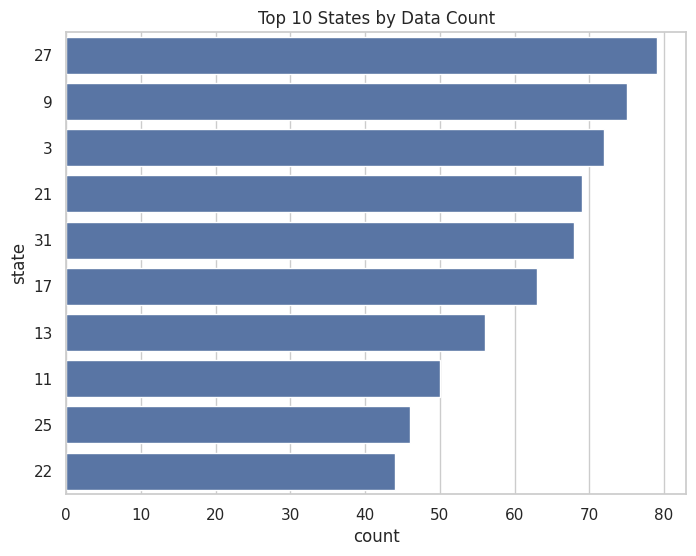

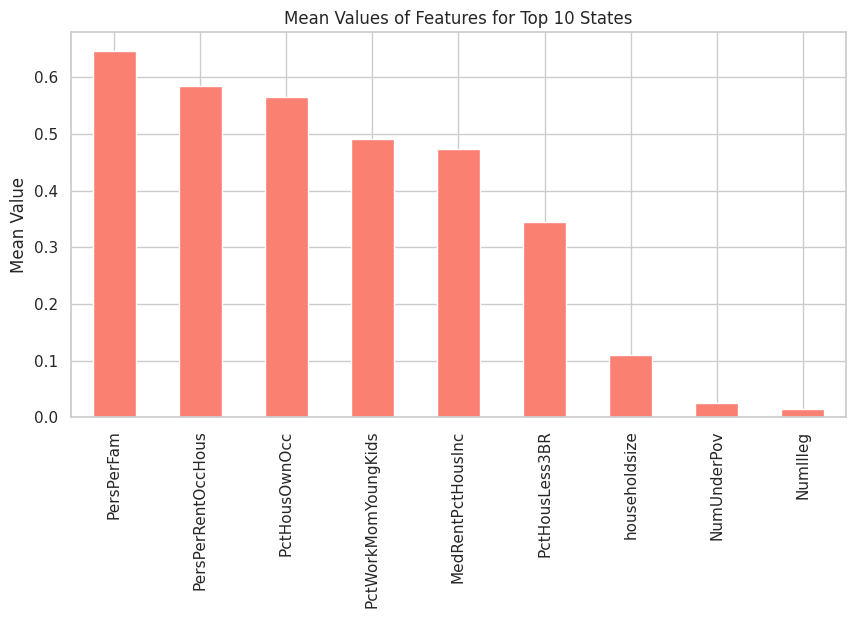

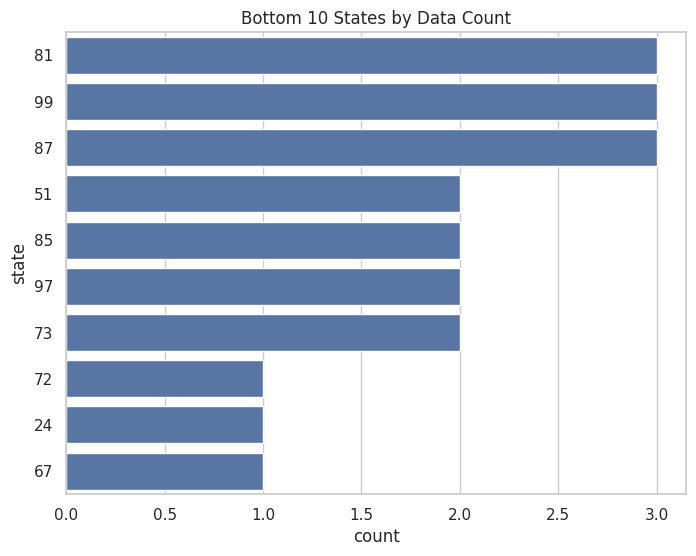

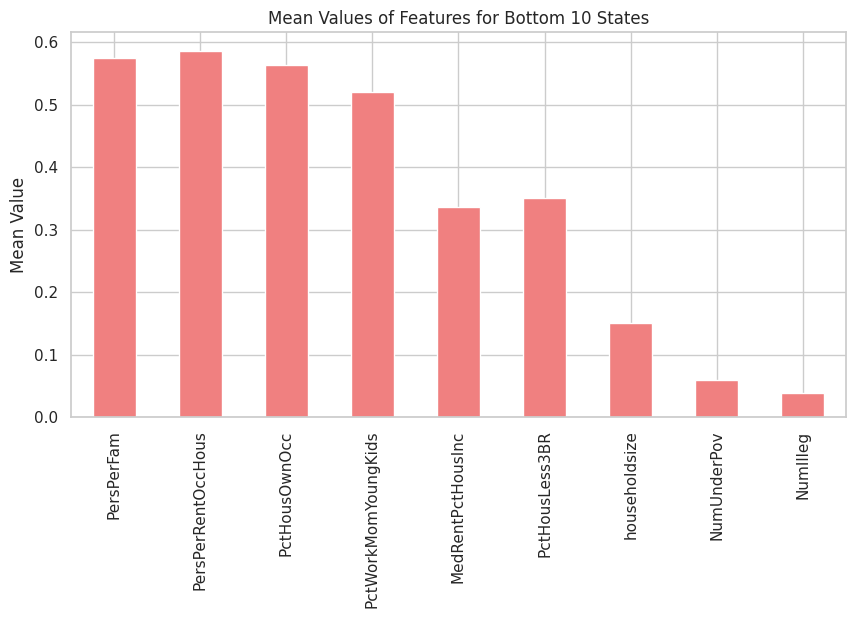

In [7]:
# Bar Charts

# Data Count Across All States
plt.figure(figsize=(12, 10))
sns.countplot(y=df['state'], order=df['state'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Data Distribution by State")
plt.yticks(fontsize=8)
plt.show()

# Mean Values of Features Across All States
feature_order = df.drop(columns=['state']).mean().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
feature_means = df.drop(columns=['state']).mean()[feature_order]
feature_means.plot(kind='bar', color='skyblue')
plt.title("Mean Values of Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()

# Top 10 States by Data Count
plt.figure(figsize=(8, 6))
sns.countplot(y=df['state'], order=df['state'].value_counts().index[:10])
plt.title("Top 10 States by Data Count")
plt.show()

# Mean Values of Features for Top 10 States
top_10_states = df[df['state'].isin(df['state'].value_counts().index[:10])]
plt.figure(figsize=(10, 5))
top_10_feature_means = top_10_states.drop(columns=['state']).mean()[feature_order]
top_10_feature_means.plot(kind='bar', color='salmon')
plt.title("Mean Values of Features for Top 10 States")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()

# Bottom 10 States by Data Count
plt.figure(figsize=(8, 6))
sns.countplot(y=df['state'], order=df['state'].value_counts().index[-10:])
plt.title("Bottom 10 States by Data Count")
plt.show()

# Mean Values of Features for Bottom 10 States
bottom_10_states = df[df['state'].isin(df['state'].value_counts().index[-10:])]
plt.figure(figsize=(10, 5))
bottom_10_feature_means = bottom_10_states.drop(columns=['state']).mean()[feature_order]
bottom_10_feature_means.plot(kind='bar', color='lightcoral')
plt.title("Mean Values of Features for Bottom 10 States")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()